# Project 5 -- Ansh Tandon

**TA Help:** John Smith, Alice Jones

- Help with figuring out how to write a function.
    
**Collaboration:** Jay Sunkara

- Helped me with Question 1 Part B and C on to figure out how to add values to TRANSACTION_AMT column and graph that using a BarPlot. 

## Question 1

In [3]:
myDF <- read.csv("/anvil/projects/tdm/data/election/escaped2020sample.txt", sep="|")

In [4]:
options(jupyter.rich_display = F)

In [5]:
options(repr.matrix.max.cols=30, repr.matrix.max.rows=200)

In [14]:
head(myDF)

  CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
1 C00401224 N         YE                     2.020013e+17 24T           
2 C00401224 N         M4     P               2.020042e+17 24T           
3 C00193433 N         YE     P               2.020012e+17 15            
4 C00401224 N         YE                     2.020013e+17 24T           
5 C00401224 N         MY                     2.019073e+17 24T           
6 C00618371 N         Q3     P               2.019102e+17 15            
  ENTITY_TP NAME             CITY         STATE ZIP_CODE EMPLOYER    
1 IND       SOLOMON, VICTOR  CAPE CORAL   FL    33904    RETIRED     
2 IND       MYERS, ELIZABETH SCOTTSVILLE  NY    14546    NOT EMPLOYED
3 IND       HASKINS, GEORGE  HARTSDALE    NY    10530    NOT EMPLOYED
4 IND       KOLBE, NINA      WASHINGTON   DC    20003    SELF        
5 IND       ESSENBERG, PENNY GRAND RAPIDS MI    49534                
6 IND       GIEBEL, BETTY    KISSIMMEE    FL    34744    HOMEMAKER   

In [15]:
head(myDF$TRANSACTION_DT)

[1]  7112019  3042020 12182019  8302019  3212019  7112019

In [16]:
library(lubridate, warn.conflicts = FALSE)

In [17]:
myDF$newdates <-mdy(myDF$TRANSACTION_DT)

In [18]:
class(myDF$TRANSACTION_DT)

[1] "integer"

In [45]:
class(myDF$newdates)

[1] "Date"

In [21]:
head(myDF$newdates)

[1] "2019-07-11" "2020-03-04" "2019-12-18" "2019-08-30" "2019-03-21"
[6] "2019-07-11"

In [22]:
myDF$TRANSACTION_YR <- year(myDF$newdates)

In [23]:
head(myDF$TRANSACTION_YR)

[1] 2019 2020 2019 2019 2019 2019

In [24]:
table(myDF$TRANSACTION_YR)


   2002    2010    2015    2016    2017    2018    2019    2020 
      1       1       3       2       3     369 3160207 1518175 

In [26]:
sumOfResults <- tapply(myDF$TRANSACTION_AMT, myDF$TRANSACTION_YR, sum)

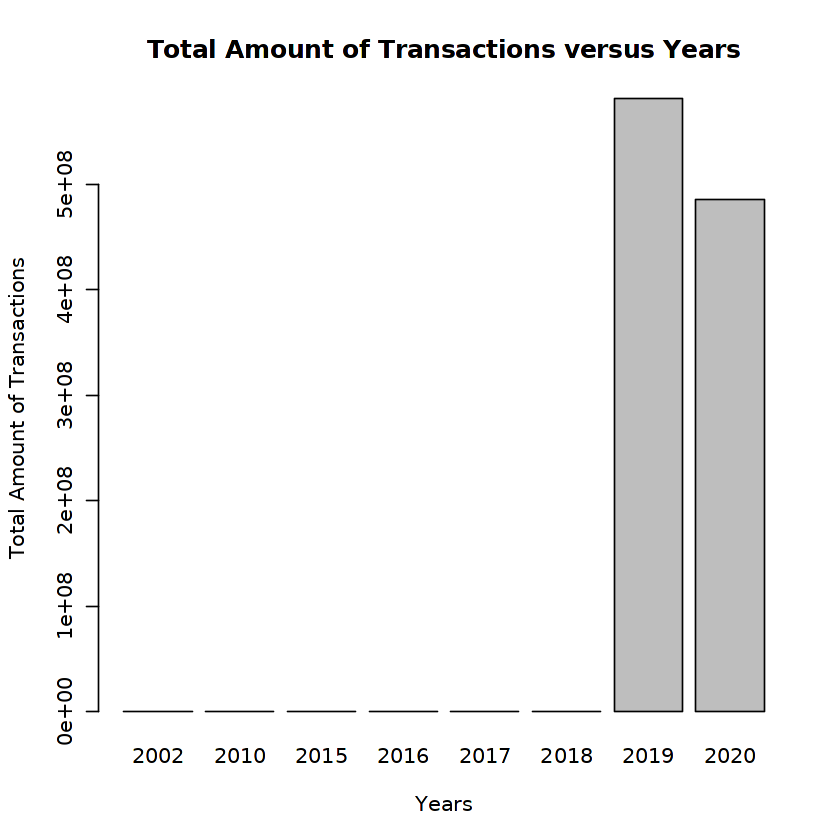

In [32]:
barplot(sumOfResults, main = "Total Amount of Transactions versus Years", xlab = "Years", ylab = "Total Amount of Transactions")

Markdown notes and sentences and analysis written here.

## Question 2

In [33]:
my2020DF <- subset(myDF, TRANSACTION_YR == "2020")

In [34]:
dim(my2020DF)

[1] 1518175      23

In [35]:
my2020DF$TRANSACTION_MONTH <- month(my2020DF$newdates)

In [36]:
head(my2020DF)

   CMTE_ID   AMNDT_IND RPT_TP TRANSACTION_PGI IMAGE_NUM    TRANSACTION_TP
2  C00401224 N         M4     P               2.020042e+17 24T           
9  C00523936 N         M5     P               2.020051e+17 15            
11 C00369033 N         12P    P2020           2.020022e+17 15E           
12 C00401224 N         M4     P               2.020042e+17 24T           
13 C00003418 N         M4     P               2.020042e+17 15            
14 C00696948 N         M2     P2020           2.020022e+17 15E           
   ENTITY_TP NAME                   CITY        STATE ZIP_CODE 
2  IND       MYERS, ELIZABETH       SCOTTSVILLE NY    14546    
9  IND       DICE, KEVIN            SOMERSET    NJ    088731111
11 IND       SMELLEY, KAY MS.       CYPRESS     TX    774293945
12 IND       WELLMAN, NANCY         RIVERDALE   NY    10471    
13 IND       WARD, KATHLEEN A. MRS. PALOS PARK  IL    604641414
14 IND       GIBLIN, KATHLEEN       SEATTLE     WA    981443225
   EMPLOYER             OCCUPATION

In [39]:
tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONTH, sum)

        1         2         3         4         5        12 
 69236956 308473457  92913000  14690773    483017      3300 

In [40]:
sumOfResults <- tapply(my2020DF$TRANSACTION_AMT, my2020DF$TRANSACTION_MONTH, sum)

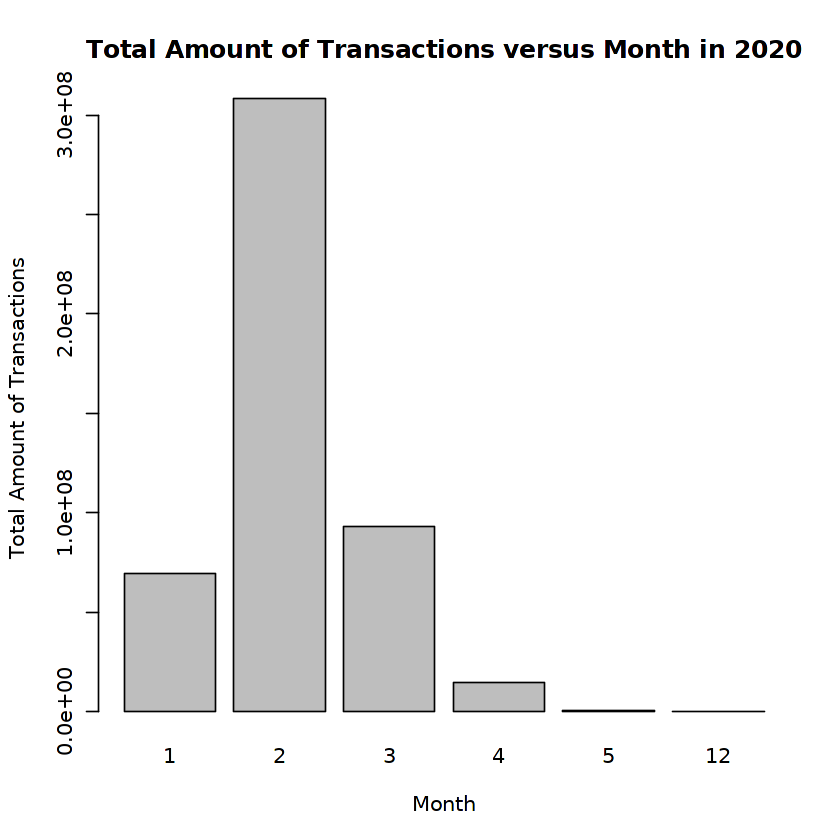

In [41]:
barplot(sumOfResults, main = "Total Amount of Transactions versus Month in 2020", xlab = "Month", ylab = "Total Amount of Transactions")

Markdown notes and sentences and analysis written here.

## Question 3

In [42]:
head(sort(tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)))

                   SCHWEMMER, LYNDA     SIDERS, DARYL            THOMAS 
             9480               200                25              2500 
       #N/A, #N/A  'CALLEN, MICHAEL 
              140               250 

In [43]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$NAME, sum)))

            REPUBLICAN GOVERNORS ASSOCIATION 
                                     3300000 
UNITED BROTHERHOOD OF CARPENTERS AND JOINERS 
                                     3936291 
                                  YASS, JEFF 
                                     6047000 
   EVERYTOWN FOR GUN SAFETY ACTION FUND, INC 
                                    10005656 
                                 STEYER, TOM 
                                    24796081 
                       BLOOMBERG, MICHAEL R. 
                                   275751211 

In [56]:
sumResults <- tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)

In [58]:
sumResults

                 AA        AB        AE        AK        AL        AP        AR 
   431548     32243      1474     87137   1627993   7195054     49240   5690116 
       AS        AZ        BC        CA        CO        CT        DC        DE 
     2908  11750510     12083 151842431  18025653  12065158  37280905   2120061 
       FL        FM        GA        GU        HI        IA        ID        IL 
 44118779      2250  17026567     78087   1730014   4291247   1626126  27940911 
       IN        KS        KY        LA        MA        MB        MD        ME 
  8906170   4311170   4440149   6202190  32308431       213  14940848   3393310 
       MH        MI        MN        MO        MP        MS        MT        NB 
     5000  15933204   9990430   7123990     10098   1844410   2389091       417 
       NC        ND        NE        NH        NJ        NL        NM        NS 
 13368140   1665152   2418525   2970383  16327791       909   4137547       678 
       NT        NV        N

In [52]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)))

       MA        DC        FL        TX        CA        NY 
 32308431  37280905  44118779  63719103 151842431 364883860 

In [60]:
tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)), n = 10)

200361806 101543302     78209     20006 200012133 190041188 101634184 941040626 
  2500100   2603700   3357597   3763519   3972934   5014000  10005656  24794281 
101501101 101501060 
 64868135 210077476 

The biggest donor is Micheal R. Bloomberg in the data set. 

The total amount given in the 5 biggest donor states is New York, California, Texas, Florida, District of Columbia. 

Then 10 zipcodes in which the most money is donated altogether is 200361806, 101543302, 78209, 20006, 200012133, 190041188, 101634184, 941040626, 101501101, and 101501060. 

## Question 4

In [64]:
sumOfResults <- tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$STATE, sum)))

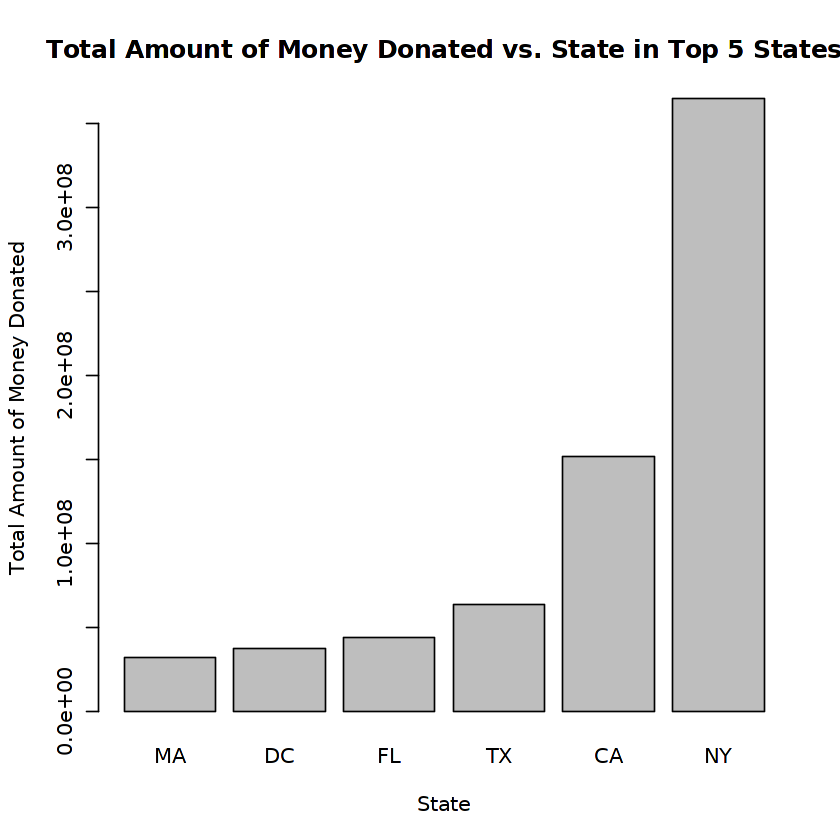

In [65]:
barplot(sumOfResults, main = "Total Amount of Money Donated vs. State in Top 5 States", xlab = "State", ylab = "Total Amount of Money Donated")

In [66]:
sumResults <- tail(sort(tapply(myDF$TRANSACTION_AMT, myDF$ZIP_CODE, sum)), n = 10)

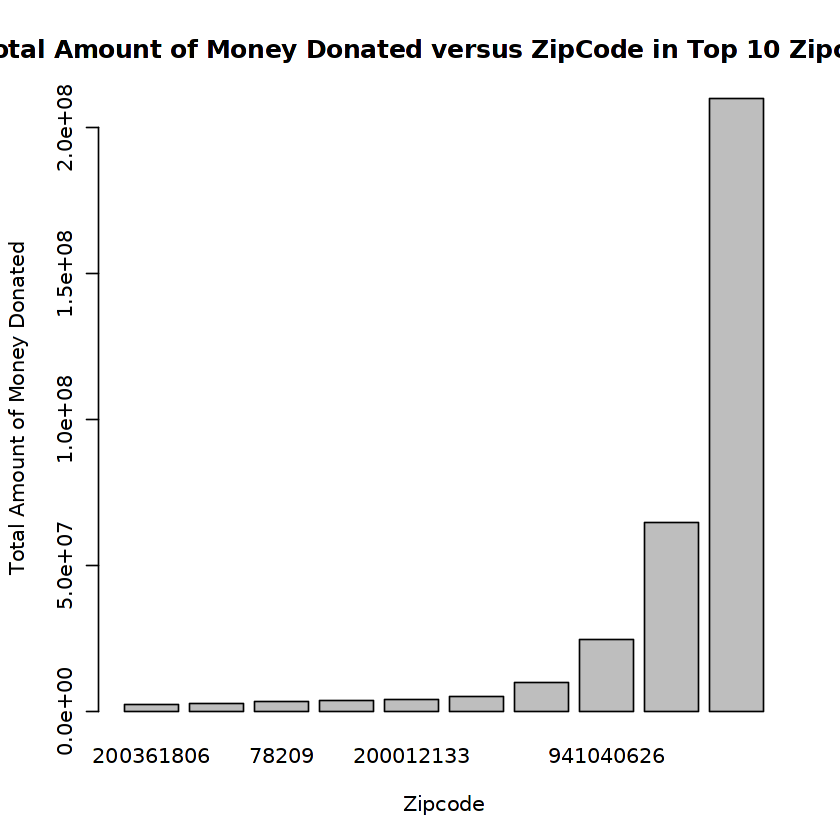

In [67]:
barplot(sumResults, main = "Total Amount of Money Donated versus ZipCode in Top 10 Zipcodes", xlab = "Zipcode", ylab = "Total Amount of Money Donated")

Markdown notes and sentences and analysis written here.

## Question 5

In [9]:
sumOfResults <- tapply(myDF$TRANSACTION_DT, myDF$STATE, sum)

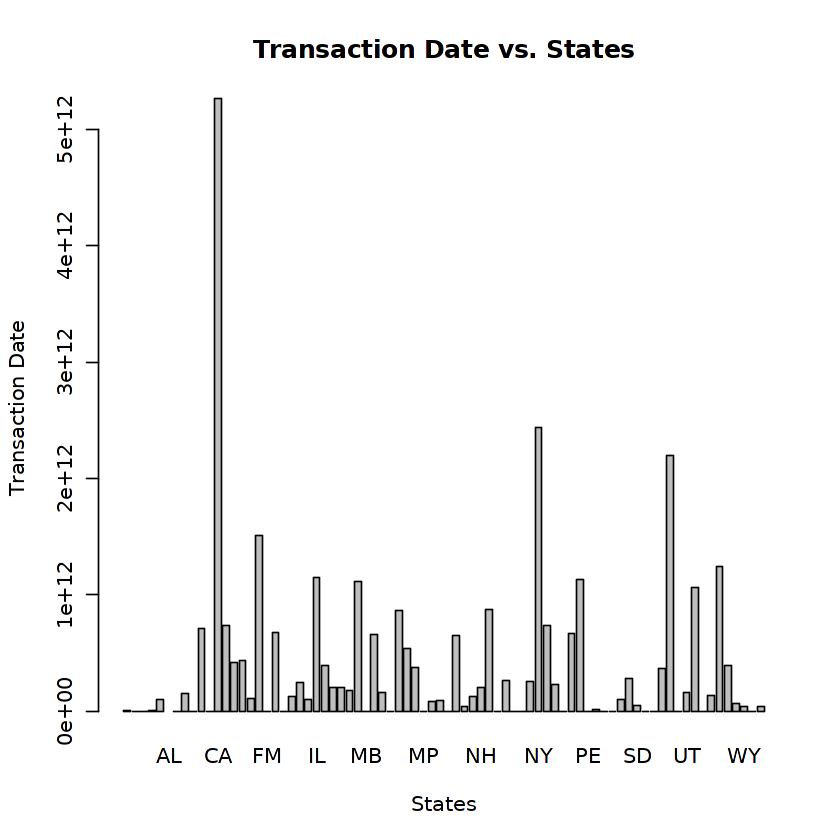

In [18]:
barplot(sumOfResults, main = "Transaction Date vs. States", xlab = "States", ylab = "Transaction Date")

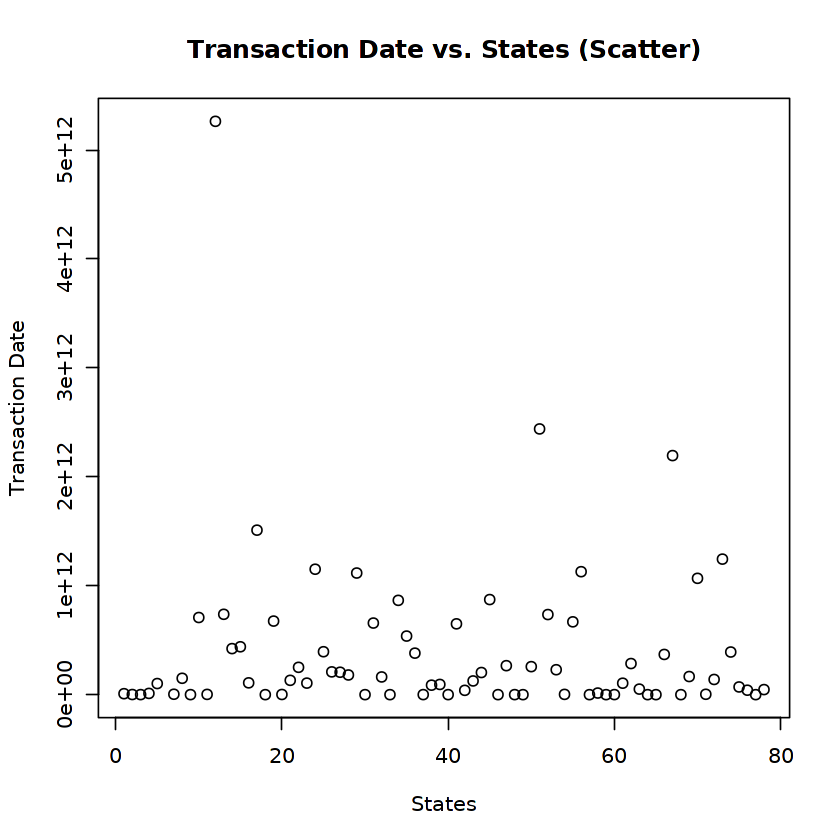

In [20]:
plot(sumOfResults, main = "Transaction Date vs. States (Scatter)", xlab = "States", ylab = "Transaction Date")

I found this particular data interesting because it demonstrates the dates in which transactions occur in each state, with their frequency as well as the dates throughout the entire calendar year. First and foremost, this data shows that California has had transactions that occur at a later point in time, and none of the states have those transaction dates. The reason why I used both a scatter and a plot was to see the frequency of the transactions within this data was to see the frequency, and it was evident that for the rest of the states like New Hampshire, Wyoming, and Alabama, the majority of transactions occurred earlier on the overall timeline. Not only that, I was able to analyze that only the primary states that are continuing to make the transactions are in fact just California and New York. Finally, considering the overall trend in the data other than the two states I mentioned earlier, this data seems to be relatively static.

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.